Nimrod Tachnai, MSc Student, Data Science, HIT 

## 1. Research and Explain

### 1.1. Thresholding
• **A detailed description of how the technique works**: Thresholding is an image segmentation technique that separates an image into foreground and background pixels. It works by classifying each pixel as belonging to the foreground or background based on its value compared to a chosen threshold. There are different thresholding methods, including global thresholding, adaptive thresholding, and Otsu's method. It Used in binarization, image segmentation, and image preprocessing tasks

• **The advantages and disadvantages of the technique**:

        Advantages:
        - Simple to implement and considered computationally efficient.
        - Effective for images with a clear contrast between objects and background.
        
        Disadvantages:
        - Has trouble with variations in lighting conditions, noise, and image quality.
        - Struggles with complex images with multiple objects of different intensities.

• **One practical application where this technique is commonly used**: In medical usages, thresholding can be applied to analyze medical scans and tests such as blood tests, a certain level of types of blood cell count might be set as a threshold.



### 1.2. Edge-Based Segmentation

•	**A detailed description of how the technique works**: Edge-based segmentation detects object boundaries within an image by identifying points where there is a sharp change in intensity. Techniques like the Sobel, Canny, and Prewitt edge detectors are commonly used. The detected edges are then connected to form object boundaries.

•	The advantages and disadvantages of the technique:

    Advantages:
        - Effective in detecting the shape and structure of objects.
        - Works well for images with well-defined edges.

    Disadvantages:
        - Sensitivity to noise which can lead to false edges
        - Difficult to select the appropriate parameters
        - Computational complexity is a key challenge in edge detection.

•	**One practical application where this technique is commonly used**: edge-based segmentation helps identify and isolate specific structures or anomalies such as detecting tumors or lesions by outlining their edges.


### 1.3. Region-Based Segmentation

•	**A detailed description of how the technique works**: Region-based segmentation groups pixels into similar properties into coherent regions such as intensity, texture, or color. Techniques include area growing, areas splitting and merging, and watershed transformation. Region growing starts with seed points and expands regions by adding neighboring pixels with similar properties. 

•	The advantages and disadvantages of the technique:

    Advantages:
        - Can produce more accurate segmentation results for images with homogeneous regions.
        - Less sensitive to noise compared to edge-based methods.

    Disadvantages:
        - Requires selection of appropriate criteria for region similarity.
        - Can be computationally intensive.

•	**One practical application where this technique is commonly used**: : Medical image analysis for tumor detection.


## 2. Implementation and Comparison

**Chosen Dataset**: "The Berkeley Segmentation Dataset" is selected as it contains a variety of natural images with ground truth segmentations.

In [20]:
import scipy.io
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import flood

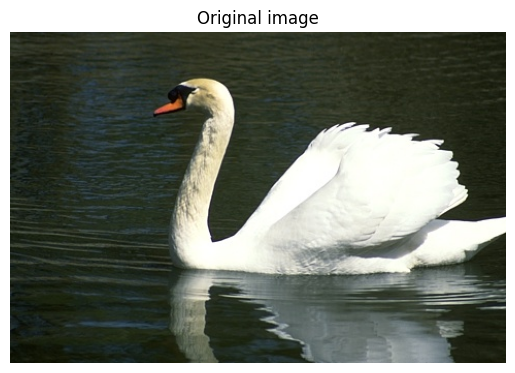

In [21]:
def plot_image(image_path, title):

    try:
        image = cv2.imread(image_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off') 
        plt.show()

    except Exception as e:
        print(f"Error: {e}")
        


if __name__ == "__main__":
    image_path = "8068.jpg"
    plot_image(image_path, 'Original image')


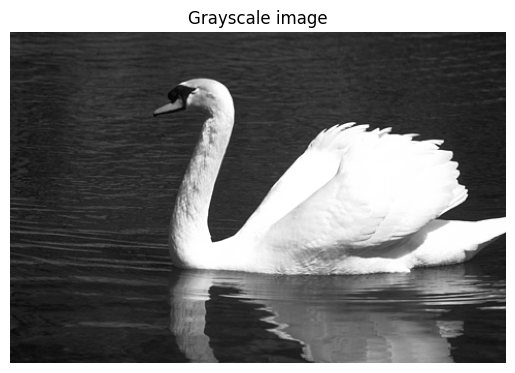

In [28]:
def plot_image(image_path, title):

    try:
        image = cv2.imread(image_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cmap='gray')
        plt.title(title)
        plt.axis('off') 
        plt.show()

    except Exception as e:
        print(f"Error: {e}")
        


if __name__ == "__main__":
    image_path = "8068.jpg"
    plot_image(image_path, 'Grayscale image')


### Ground Truth

In [22]:
def load_ground_truth(mat_file_path):
    mat_data = scipy.io.loadmat(mat_file_path)
    ground_truth_data = mat_data['groundTruth'] # Extract the 'groundTruth' data
    ground_truth_segmentation = ground_truth_data[0][0][0][0] # Access the specific segmentation
    return ground_truth_segmentation

if __name__ == "__main__":
    mat_file_path = "8068.mat"
    ground_truth = load_ground_truth(mat_file_path)
    ground_truth = ground_truth[1] # Extract the second segmentation

### I. Thresholding

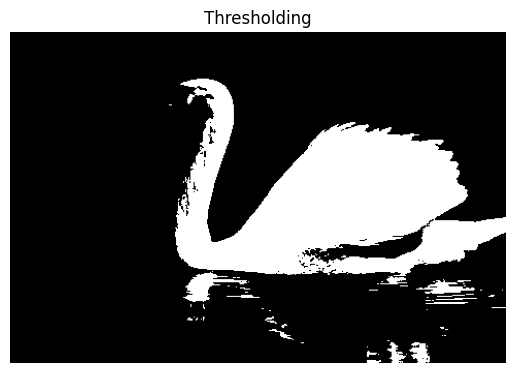

In [23]:
def thresholding(image_path, title):
    try:
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert to grayscale
        _, thresh = cv2.threshold(gray, 150, 100, cv2.THRESH_BINARY) # Apply binary thresholding

        plt.imshow(thresh, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error: {e}")

    return thresh

if __name__ == "__main__":
    image_path = "8068.jpg"
    thresh_image = thresholding(image_path,'Thresholding')


### II. Edge-based Segmentation

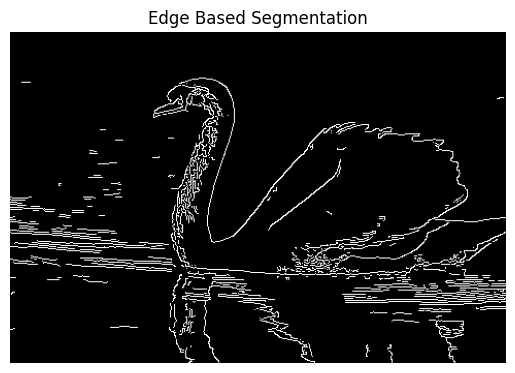

In [24]:
def edge_based_segmentation(image_path, title):
    try:
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert to grayscale
        edges = cv2.Canny(gray, 150, 100) # Apply Canny Edge Detection
        
        plt.imshow(edges, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error: {e}")

    return edges

if __name__ == "__main__":
    image_path = "8068.jpg"
    edge_based_image = edge_based_segmentation(image_path,'Edge Based Segmentation')


### III. Region-based Segmentation

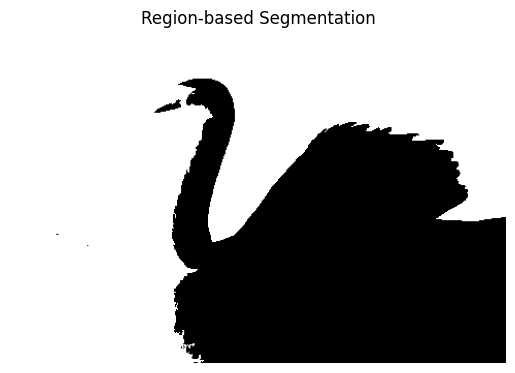

In [25]:
def region_growing(image_path, seed_point, title):
    try:
        image = cv2.imread(image_path)             
        
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert to grayscale
        mask = flood(gray, seed_point, tolerance=50).astype(int) # Apply region growing (using flood fill)

        plt.imshow(mask, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error: {e}")
    
    return mask


if __name__ == "__main__":
    image_path = "8068.jpg"
    seed_point = (150, 100)
    region_growing_image = region_growing(image_path, seed_point, 'Region-based Segmentation')

## Evaluation

c:\Users\NIMROD\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NIMROD\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NIMROD\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NIMROD\miniconda3\Lib\site-packag

                        Metric  Thresholding  Edge-based  Region-growing
0  Dice Coefficient (F1 Score)      0.866666    0.954122        0.555726
1                    Precision      0.971298    0.973734        0.961097
2                       Recall      0.782385    0.935285        0.395244
3                Jaccard Index      0.773423    0.924705        0.386873
None


C:\Users\NIMROD\AppData\Local\Temp\ipykernel_5024\1862771894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(method_names, rotation=70)
C:\Users\NIMROD\AppData\Local\Temp\ipykernel_5024\1862771894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(method_names, rotation=70)
C:\Users\NIMROD\AppData\Local\Temp\ipykernel_5024\1862771894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(method_names, rotation=70)
C:\Users\NIMROD\AppData\Local\Temp\ipykernel_5024\1862771894.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(method_names, rotation=70)


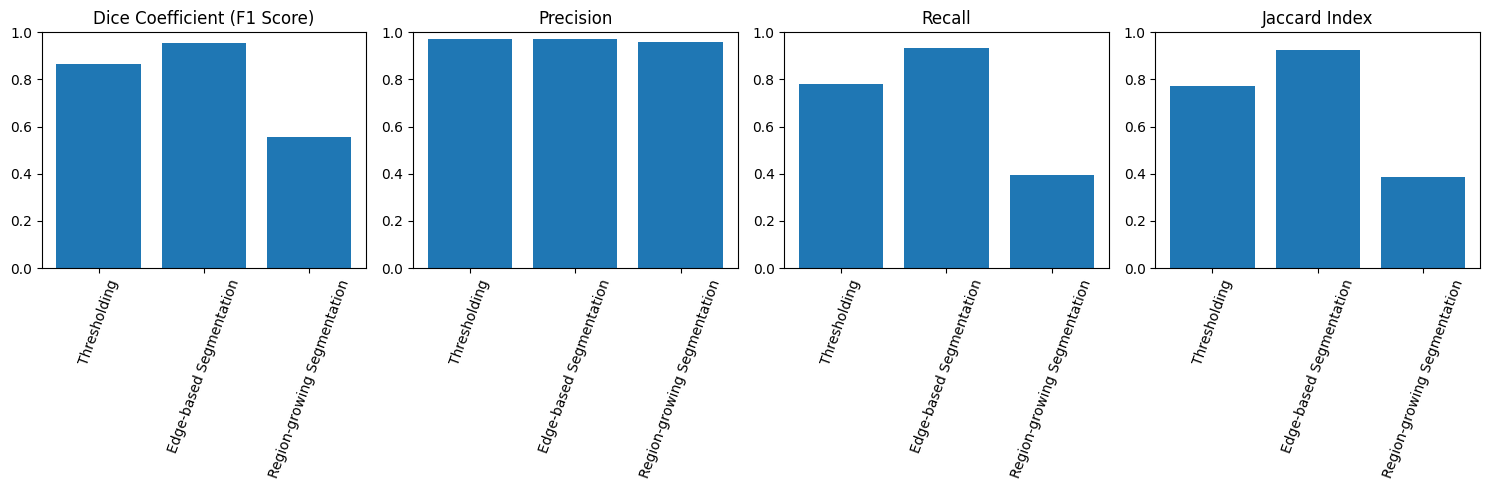

In [26]:
from sklearn.metrics import precision_score, recall_score, jaccard_score, f1_score
import pandas as pd



# Function to calculate segmentation metrics
def calculate_metrics(ground_truth, prediction):
    f1 = f1_score(ground_truth.flatten(), prediction.flatten(), average='weighted')
    precision = precision_score(ground_truth.flatten(), prediction.flatten(), average= 'weighted')
    recall = recall_score(ground_truth.flatten(), prediction.flatten(), average='weighted')
    jaccard = jaccard_score(ground_truth.flatten(), prediction.flatten(), average='weighted')
    return [f1, precision, recall, jaccard]

def plot_metrics(metrics, method_names, metric_names):
    num_methods = len(method_names)
    num_metrics = len(metric_names)

    fig, axs = plt.subplots(1, num_metrics, figsize=(15, 5))

    for i, metric_name in enumerate(metric_names):
        values = [metrics[j][i] for j in range(num_methods)]
        axs[i].bar(method_names, values)
        axs[i].set_title(metric_name)
        axs[i].set_ylim(0, 1)
        axs[i].set_xticklabels(method_names, rotation=70)

    plt.tight_layout()
    plt.show()



def create_metrics_table(metrics_thresholding, metrics_edge, metrics_region):
    data = {
        'Metric': ['Dice Coefficient (F1 Score)', 'Precision', 'Recall', 'Jaccard Index'],
        'Thresholding': metrics_thresholding,
        'Edge-based': metrics_edge,
        'Region-growing': metrics_region
    }

    df = pd.DataFrame(data)
    print(df)


if __name__ == "__main__":

    # Calculate metrics for thresholding
    metrics_thresholding = calculate_metrics(ground_truth, thresh_image)
    metrics_thresholding_tbl = [metrics_thresholding[0], metrics_thresholding[1], metrics_thresholding[2], metrics_thresholding[3]]

    # Calculate metrics for edge-based segmentation
    metrics_edge = calculate_metrics(ground_truth, edge_based_image)
    metrics_edge_tbl = [metrics_edge[0], metrics_edge[1], metrics_edge[2], metrics_edge[3]]

    # Calculate metrics for region-growing segmentation
    metrics_region = calculate_metrics(ground_truth, region_growing_image)
    metrics_region_tbl = [metrics_region[0], metrics_region[1], metrics_region[2], metrics_region[3]]

    print(create_metrics_table(metrics_thresholding_tbl, metrics_edge_tbl, metrics_region_tbl))

    # Plot the metrics
    metrics = [metrics_thresholding, metrics_edge, metrics_region]
    method_names = ['Thresholding', 'Edge-based Segmentation', 'Region-growing Segmentation']
    metric_names = ['Dice Coefficient (F1 Score)', 'Precision', 'Recall', 'Jaccard Index']

    plot_metrics(metrics, method_names, metric_names)


## Discussion

### Segmentation Technique Summaries:

**Thresholding:**  Very good at identifying foreground objects with high contrast against the background (Precision of 0.97). However, it struggles with uneven lighting or objects blending into the background (Recall of 0.78). 

**Edge-based Segmentation:** This method effectively separates objects by detecting their edges with high Precision and Recall (97% and 93%). It works well because the boundaries are clear, but may struggle with noisy images or blurry edges. This technique performed the best on the dataset. This superior performance can be attributed to its robustness in detecting edges, which are prominent features in many images. The high Recall and Jaccard Index values indicate that this method successfully identified and segmented the majority of the objects within the image, leading to a comprehensive and accurate segmentation.

**Region-growing Segmentation:**  Relies on a starting point to grow regions, making it sensitive to noise and initial seed placement. Despite high precision, it missed many true objects (low Recall of 0.40). 



### Challenges Faced
1. Finding the optimal parameters for each technique was challenging. For example, the threshold value in thresholding and the high and low threshold values in the Canny edge detection algorithm had a significant impact on the results.
2. Handling noise and intensity variability within the images posed a significant challenge, especially for the region-growing technique.


### segmentation technique impact the outcomes in a real-world application

**Medical Imaging** Accurate segmentation is essential for disease diagnosis. Edge-based methods are helpful in highlighting anatomical structures, but noisy or low-contrast images can lead to misdiagnosis due to segmentation errors.

**Autonomous Driving:** Precise segmentation is crucial for self-driving cars to identify pedestrians, vehicles, and road signs. While edge-based techniques can detect object outlines, their performance in variable lighting and weather needs careful consideration.